<div style="background-color:#9dedde; padding: 15px">
<h2>Projet 7 : Implémentez un modèle de Scoring</h2>
</div>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly import tools
import plotly.express as px
from datetime import datetime
import datetime

#pd.set_option('display.max_columns', 200)
#pd.set_option('display.max_rows', 1000)

# **Chargement des données**

In [58]:
df= pd.read_csv('app_train_sample.csv')

In [59]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,196888,0,Cash loans,F,N,Y,0,135000.0,1350000.0,39604.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,101392,0,Cash loans,F,Y,Y,0,81000.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,435135,0,Cash loans,F,N,N,0,112500.0,298512.0,19948.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,396314,0,Cash loans,M,N,N,0,81000.0,218016.0,17352.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
4,341153,1,Cash loans,F,N,Y,0,90000.0,1006920.0,42790.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,311641,0,Cash loans,F,N,N,1,90000.0,808650.0,23773.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
30747,151728,1,Cash loans,M,N,Y,0,40500.0,85500.0,9108.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
30748,384640,0,Revolving loans,F,Y,Y,0,69750.0,247500.0,12375.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
30749,437079,0,Cash loans,F,N,Y,0,36000.0,270000.0,9828.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0


# **Analyse de la forme du dataset**

In [60]:
df.shape

(30751, 122)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30751 entries, 0 to 30750
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 28.6+ MB


In [62]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [63]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [64]:
df.select_dtypes(object).nunique().sort_values(ascending = False)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
WALLSMATERIAL_MODE             7
NAME_INCOME_TYPE               6
NAME_HOUSING_TYPE              6
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
dtype: int64

In [65]:
(df.select_dtypes(object).nunique().sort_values(ascending = False)/len(df)).round(3)

ORGANIZATION_TYPE             0.002
OCCUPATION_TYPE               0.001
NAME_TYPE_SUITE               0.000
WEEKDAY_APPR_PROCESS_START    0.000
WALLSMATERIAL_MODE            0.000
NAME_INCOME_TYPE              0.000
NAME_HOUSING_TYPE             0.000
NAME_EDUCATION_TYPE           0.000
NAME_FAMILY_STATUS            0.000
FONDKAPREMONT_MODE            0.000
HOUSETYPE_MODE                0.000
NAME_CONTRACT_TYPE            0.000
CODE_GENDER                   0.000
FLAG_OWN_CAR                  0.000
FLAG_OWN_REALTY               0.000
EMERGENCYSTATE_MODE           0.000
dtype: float64

# **NaN & Duplicated**

In [66]:
df.duplicated().sum()

0

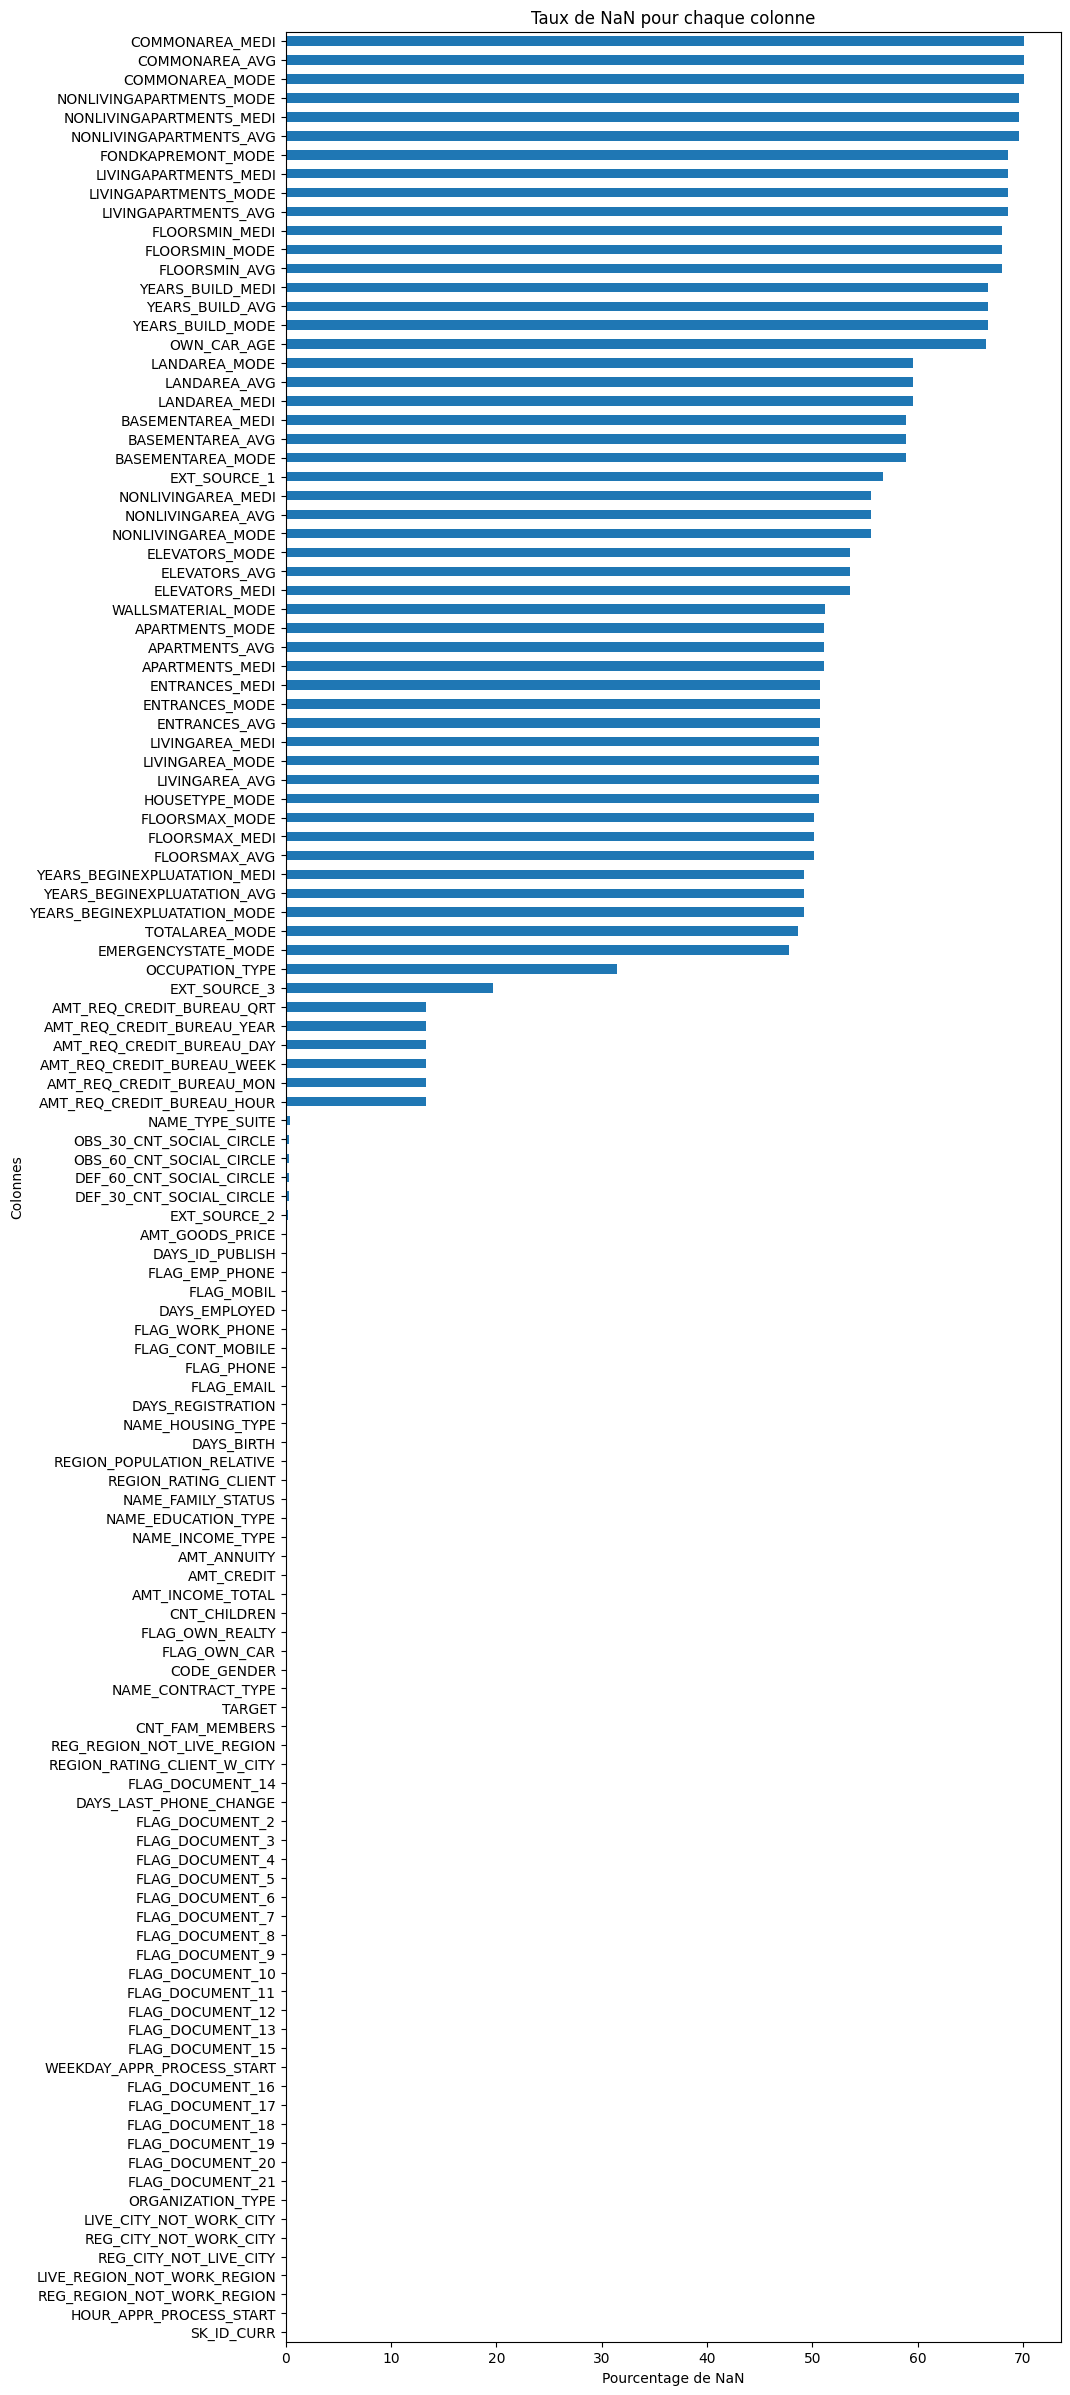

In [67]:
# Calculer les taux de NaN pour chaque colonne
nan_counts = df.isna().sum() / len(df) * 100

# Créer un graphique à barres horizontales pour visualiser les taux de NaN
plt.figure(figsize=(10, 30))
nan_counts.sort_values().plot(kind='barh')
plt.title('Taux de NaN pour chaque colonne')
plt.xlabel('Pourcentage de NaN')
plt.ylabel('Colonnes')
plt.show()

In [68]:
# Calculer les taux de NaN pour chaque colonne
nan_counts = df.isna().sum() / len(df) * 100

# Créer une dataframe triée par ordre décroissant des taux de NaN
sorted_nan_counts = nan_counts.sort_values(ascending=False).reset_index()
sorted_nan_counts.columns = ['Colonnes', 'Taux_NaN']


# Créer une coloration (cmap) pour la dataframe
cmap = plt.get_cmap('Reds')
sorted_nan_counts.style.background_gradient(cmap='Reds', subset=['Taux_NaN'])

,Colonnes,Taux_NaN
0,COMMONAREA_MEDI,70.079022
1,COMMONAREA_AVG,70.079022
2,COMMONAREA_MODE,70.079022
3,NONLIVINGAPARTMENTS_MODE,69.659523
4,NONLIVINGAPARTMENTS_AVG,69.659523
5,NONLIVINGAPARTMENTS_MEDI,69.659523
6,FONDKAPREMONT_MODE,68.615655
7,LIVINGAPARTMENTS_MODE,68.553868
8,LIVINGAPARTMENTS_AVG,68.553868
9,LIVINGAPARTMENTS_MEDI,68.553868


In [69]:
# Calculer les taux de NaN pour chaque colonne
nan_percentages = df.isna().mean() * 100

# Identifier les colonnes avec plus de 60% de NaN
cols_to_drop = nan_percentages[nan_percentages > 60].index

# Supprimer les colonnes identifiées
df = df.drop(cols_to_drop, axis=1)

In [70]:
# Calculer les taux de NaN pour chaque colonne
nan_counts = df.isna().sum() / len(df) * 100

# Créer une dataframe triée par ordre décroissant des taux de NaN
sorted_nan_counts = nan_counts.sort_values(ascending=False).reset_index()
sorted_nan_counts.columns = ['Colonnes', 'Taux_NaN']


# Créer une coloration (cmap) pour la dataframe
cmap = plt.get_cmap('Greens')
sorted_nan_counts.style.background_gradient(cmap='Greens', subset=['Taux_NaN'])

,Colonnes,Taux_NaN
0,LANDAREA_AVG,59.565543
1,LANDAREA_MODE,59.565543
2,LANDAREA_MEDI,59.565543
3,BASEMENTAREA_AVG,58.889142
4,BASEMENTAREA_MODE,58.889142
5,BASEMENTAREA_MEDI,58.889142
6,EXT_SOURCE_1,56.742870
7,NONLIVINGAREA_AVG,55.568925
8,NONLIVINGAREA_MEDI,55.568925
9,NONLIVINGAREA_MODE,55.568925


In [71]:
df.duplicated(subset='SK_ID_CURR').sum()

0

# **Data Analyse**

In [72]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,30751.000000,30751.000000,30751.000000,3.075100e+04,3.075100e+04,30751.000000,3.072700e+04,30751.000000,30751.000000,30751.000000,...,30751.000000,30751.000000,30751.000000,30751.000000,26655.000000,26655.000000,26655.000000,26655.000000,26655.000000,26655.000000
mean,277502.048876,0.080355,0.416214,1.725484e+05,5.976381e+05,27141.339013,5.371948e+05,0.020861,-16040.187571,64634.946408,...,0.008195,0.000358,0.000293,0.000325,0.005815,0.008216,0.034065,0.263853,0.262953,1.895854
std,102861.310895,0.271847,0.723943,6.809442e+05,3.998446e+05,14405.483705,3.672385e+05,0.013822,4382.669307,141941.330696,...,0.090155,0.018910,0.017105,0.018030,0.079886,0.125409,0.201952,0.912617,0.611597,1.872551
min,100011.000000,0.000000,0.000000,2.655000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25201.000000,-16678.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188725.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16616.250000,2.385000e+05,0.010006,-19718.500000,-2747.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277017.000000,0.000000,0.000000,1.440000e+05,5.135310e+05,24939.000000,4.500000e+05,0.018850,-15739.000000,-1207.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,366185.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34600.500000,6.795000e+05,0.028663,-12430.000000,-283.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456240.000000,1.000000,12.000000,1.170000e+08,4.050000e+06,225000.000000,4.050000e+06,0.072508,-7676.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,9.000000,8.000000,27.000000,7.000000,19.000000


In [73]:
df.describe(include=object)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,30751,30751,30751,30751,30627,30751,30751,30751,30751,21087,30751,30751,15195,15001,16051
unique,2,2,2,2,7,6,5,5,6,18,7,58,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,block of flats,Panel,No
freq,27860,20198,20432,21298,24786,15960,21738,19751,27222,5565,5242,6800,14938,6666,15843


# **SELECTION DES COLONNES**

In [74]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,196888,0,Cash loans,F,N,Y,0,135000.0,1350000.0,39604.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,101392,0,Cash loans,F,Y,Y,0,81000.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,435135,0,Cash loans,F,N,N,0,112500.0,298512.0,19948.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,396314,0,Cash loans,M,N,N,0,81000.0,218016.0,17352.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
4,341153,1,Cash loans,F,N,Y,0,90000.0,1006920.0,42790.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,311641,0,Cash loans,F,N,N,1,90000.0,808650.0,23773.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
30747,151728,1,Cash loans,M,N,Y,0,40500.0,85500.0,9108.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
30748,384640,0,Revolving loans,F,Y,Y,0,69750.0,247500.0,12375.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
30749,437079,0,Cash loans,F,N,Y,0,36000.0,270000.0,9828.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0


In [75]:
# Liste des noms de colonnes
columns = {
    # Informations générales sur les clients :
    'SK_ID_CURR': 'ID_CLIENT',
    'TARGET': 'CIBLE',
    'NAME_CONTRACT_TYPE': 'TYPE_CONTRAT',

    # Informations personnelles sur le client :
    'CODE_GENDER': 'GENRE',
    'FLAG_OWN_CAR': 'PROPRIETAIRE_VOITURE',
    'FLAG_OWN_REALTY': 'PROPRIETAIRE_BIEN_IMMO',
    'CNT_CHILDREN': 'NBR_ENFANTS',
    'AMT_INCOME_TOTAL': 'REVENU_TOTAL',
    'NAME_TYPE_SUITE': 'NOM_TYPE_SUITE',
    'NAME_INCOME_TYPE': 'TYPE_REVENUS',
    'NAME_EDUCATION_TYPE': 'NIVEAU_EDUCATION',
    'NAME_FAMILY_STATUS': 'STATUT_FAMILIAL',
    'NAME_HOUSING_TYPE': 'TYPE_LOGEMENT',

    # Informations démographiques et régionales :
    'REGION_POPULATION_RELATIVE': 'POPULATION_REGION',
    'REG_REGION_NOT_LIVE_REGION': 'REG_NON_RESIDENCE_REGION',
    'REG_REGION_NOT_WORK_REGION': 'REG_NON_REGION_TRAVAIL',
    'LIVE_REGION_NOT_WORK_REGION': 'RESIDENCE_NON_TRAVAIL_REGION',
    'REG_CITY_NOT_LIVE_CITY': 'REG_NON_RESIDENCE_VILLE',
    'REG_CITY_NOT_WORK_CITY': 'REG_NON_TRAVAIL_VILLE',
    'LIVE_CITY_NOT_WORK_CITY': 'RESIDENCE_NON_TRAVAIL_VILLE',

    # Informations temporelles :
    'DAYS_BIRTH': 'JOURS_NAISSANCE',
    'DAYS_EMPLOYED': 'JOURS_EMPLOI',
    'DAYS_REGISTRATION': 'JOURS_ENREGISTREMENT',
    'DAYS_ID_PUBLISH': 'JOURS_ID_PUBLICATION',
    'WEEKDAY_APPR_PROCESS_START': 'JOUR_PROCESSUS_DEBUT',
    'HOUR_APPR_PROCESS_START': 'HEURE_PROCESSUS_DEBUT',
    'DAYS_LAST_PHONE_CHANGE': 'JOURS_DERNIER_CHANGEMENT_TELEPHONE',

    # Informations sur l'organisation du client :
    'ORGANIZATION_TYPE': 'TYPE_ORGANISATION',

    # Informations provenant de sources externes :
    'EXT_SOURCE_1': 'SOURCE_EXTERNE_1',
    'EXT_SOURCE_2': 'SOURCE_EXTERNE_2',
    'EXT_SOURCE_3': 'SOURCE_EXTERNE_3',

    # Informations sur les biens immobiliers du client :
    'AMT_CREDIT': 'TOTAL_CREDIT',
    'AMT_ANNUITY': 'REMB_MENSUEL',
    'AMT_GOODS_PRICE': 'MONTANT_PRIX_BIENS',
    'APARTMENTS_AVG': 'APPARTEMENTS_MOYENNE',
    'BASEMENTAREA_AVG': 'SUPERFICIE_SOUTERRAINE_MOYENNE',
    'YEARS_BEGINEXPLUATATION_AVG': 'DEBUT_EXPLOITATION_MOYENNE',
    'ELEVATORS_AVG': 'ASCENSEURS_MOYENNE',
    'ENTRANCES_AVG': 'ENTREES_MOYENNE',
    'FLOORSMAX_AVG': 'ETAGES_MAX_MOYENNE',
    'LANDAREA_AVG': 'SUPERFICIE_TERRAIN_MOYENNE',
    'LIVINGAREA_AVG': 'SUPERFICIE_HABITABLE_MOYENNE',
    'NONLIVINGAREA_AVG': 'SUPERFICIE_NON_HABITABLE_MOYENNE',
    'APARTMENTS_MODE': 'APPARTEMENTS_MODE',
    'BASEMENTAREA_MODE': 'SUPERFICIE_SOUTERRAINE_MODE',
    'YEARS_BEGINEXPLUATATION_MODE': 'DEBUT_EXPLOITATION_MODE',
    'ELEVATORS_MODE': 'ASCENSEURS_MODE',
    'ENTRANCES_MODE': 'ENTREES_MODE',
    'FLOORSMAX_MODE': 'ETAGES_MAX_MODE',
    'LANDAREA_MODE': 'SUPERFICIE_TERRAIN_MODE',
    'LIVINGAREA_MODE': 'SUPERFICIE_HABITABLE_MODE',
    'NONLIVINGAREA_MODE': 'SUPERFICIE_NON_HABITABLE_MODE',
    'APARTMENTS_MEDI': 'APPARTEMENTS_MEDIANE',
    'BASEMENTAREA_MEDI': 'SUPERFICIE_SOUTERRAINE_MEDIANE',
    'YEARS_BEGINEXPLUATATION_MEDI': 'DEBUT_EXPLOITATION_MEDIANE',
    'ELEVATORS_MEDI': 'ASCENSEURS_MEDIANE',
    'ENTRANCES_MEDI': 'ENTREES_MEDIANE',
    'FLOORSMAX_MEDI': 'ETAGES_MAX_MEDIANE',
    'LANDAREA_MEDI': 'SUPERFICIE_TERRAIN_MEDIANE',
    'LIVINGAREA_MEDI': 'SUPERFICIE_HABITABLE_MEDIANE',
    'NONLIVINGAREA_MEDI': 'SUPERFICIE_NON_HABITABLE_MEDIANE',
    'HOUSETYPE_MODE': 'MODELE_TYPE_LOGEMENT',
    'TOTALAREA_MODE': 'SUPERFICIE_TOTALE_MODE',
    'WALLSMATERIAL_MODE': 'MODELE_MATERIAUX_MURS',
    'EMERGENCYSTATE_MODE': 'MODE_URGENCE',

    # Informations sociales du client :
    'OBS_30_CNT_SOCIAL_CIRCLE': 'OBS_30_CNT_CERCLE_SOCIAL',
    'DEF_30_CNT_SOCIAL_CIRCLE': 'DEF_30_CNT_CERCLE_SOCIAL',
    'OBS_60_CNT_SOCIAL_CIRCLE': 'OBS_60_CNT_CERCLE_SOCIAL',
    'DEF_60_CNT_SOCIAL_CIRCLE': 'DEF_60_CNT_CERCLE_SOCIAL',

    # Informations sur les documents du client :
    'FLAG_MOBIL': 'FLAG_MOBILE',
    'FLAG_EMP_PHONE': 'FLAG_TELEPHONE_EMPLOYE',
    'FLAG_WORK_PHONE': 'FLAG_TELEPHONE_TRAVAIL',
    'FLAG_CONT_MOBILE': 'FLAG_TELEPHONE_MOBILE',
    'FLAG_PHONE': 'FLAG_TELEPHONE',
    'FLAG_EMAIL': 'FLAG_EMAIL',
    'FLAG_DOCUMENT_2': 'FLAG_DOCUMENT_2',
    'FLAG_DOCUMENT_3': 'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4': 'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5': 'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6': 'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7': 'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8': 'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9': 'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10': 'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11': 'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12': 'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13': 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14': 'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15': 'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16': 'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17': 'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18': 'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19': 'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20': 'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21': 'FLAG_DOCUMENT_21',

    # Informations sur les demandes de crédit au bureau de crédit du client :
    'AMT_REQ_CREDIT_BUREAU_HOUR': 'NBR_DEMANDES_CREDIT_BUREAU_HEURE',
    'AMT_REQ_CREDIT_BUREAU_DAY': 'NBR_DEMANDES_CREDIT_BUREAU_JOUR',
    'AMT_REQ_CREDIT_BUREAU_WEEK': 'NBR_DEMANDES_CREDIT_BUREAU_SEMAINE',
    'AMT_REQ_CREDIT_BUREAU_MON': 'NBR_DEMANDES_CREDIT_BUREAU_MOIS',
    'AMT_REQ_CREDIT_BUREAU_QRT': 'NBR_DEMANDES_CREDIT_BUREAU_TRIMESTRE',
    'AMT_REQ_CREDIT_BUREAU_YEAR': 'NBR_DEMANDES_CREDIT_BUREAU_ANNEE'
}


In [76]:
df.rename(columns=columns, inplace=True)

In [77]:
df

,ID_CLIENT,CIBLE,TYPE_CONTRAT,GENRE,PROPRIETAIRE_VOITURE,PROPRIETAIRE_BIEN_IMMO,NBR_ENFANTS,REVENU_TOTAL,TOTAL_CREDIT,REMB_MENSUEL,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,NBR_DEMANDES_CREDIT_BUREAU_HEURE,NBR_DEMANDES_CREDIT_BUREAU_JOUR,NBR_DEMANDES_CREDIT_BUREAU_SEMAINE,NBR_DEMANDES_CREDIT_BUREAU_MOIS,NBR_DEMANDES_CREDIT_BUREAU_TRIMESTRE,NBR_DEMANDES_CREDIT_BUREAU_ANNEE
0,196888,0,Cash loans,F,N,Y,0,135000.0,1350000.0,39604.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,101392,0,Cash loans,F,Y,Y,0,81000.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,435135,0,Cash loans,F,N,N,0,112500.0,298512.0,19948.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,396314,0,Cash loans,M,N,N,0,81000.0,218016.0,17352.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
4,341153,1,Cash loans,F,N,Y,0,90000.0,1006920.0,42790.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,311641,0,Cash loans,F,N,N,1,90000.0,808650.0,23773.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
30747,151728,1,Cash loans,M,N,Y,0,40500.0,85500.0,9108.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
30748,384640,0,Revolving loans,F,Y,Y,0,69750.0,247500.0,12375.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
30749,437079,0,Cash loans,F,N,Y,0,36000.0,270000.0,9828.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0


In [78]:
# Calculer les taux de NaN pour chaque colonne
nan_counts = df.isna().sum() / len(df) * 100

# Créer une dataframe triée par ordre décroissant des taux de NaN
sorted_nan_counts = nan_counts.sort_values(ascending=False).reset_index()
sorted_nan_counts.columns = ['Colonnes', 'Taux_NaN']


# Créer une coloration (cmap) pour la dataframe
cmap = plt.get_cmap('Greens')
sorted_nan_counts.style.background_gradient(cmap='Oranges', subset=['Taux_NaN'])

,Colonnes,Taux_NaN
0,SUPERFICIE_TERRAIN_MOYENNE,59.565543
1,SUPERFICIE_TERRAIN_MODE,59.565543
2,SUPERFICIE_TERRAIN_MEDIANE,59.565543
3,SUPERFICIE_SOUTERRAINE_MOYENNE,58.889142
4,SUPERFICIE_SOUTERRAINE_MODE,58.889142
5,SUPERFICIE_SOUTERRAINE_MEDIANE,58.889142
6,SOURCE_EXTERNE_1,56.742870
7,SUPERFICIE_NON_HABITABLE_MOYENNE,55.568925
8,SUPERFICIE_NON_HABITABLE_MEDIANE,55.568925
9,SUPERFICIE_NON_HABITABLE_MODE,55.568925


In [79]:
# Calculer les taux de NaN pour chaque colonne
nan_percentages = df.isna().mean() * 100

# Identifier les colonnes avec plus de 60% de NaN
cols_to_drop = nan_percentages[nan_percentages > 30].index

# Supprimer les colonnes identifiées
df = df.drop(cols_to_drop, axis=1)

In [80]:
df

,ID_CLIENT,CIBLE,TYPE_CONTRAT,GENRE,PROPRIETAIRE_VOITURE,PROPRIETAIRE_BIEN_IMMO,NBR_ENFANTS,REVENU_TOTAL,TOTAL_CREDIT,REMB_MENSUEL,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,NBR_DEMANDES_CREDIT_BUREAU_HEURE,NBR_DEMANDES_CREDIT_BUREAU_JOUR,NBR_DEMANDES_CREDIT_BUREAU_SEMAINE,NBR_DEMANDES_CREDIT_BUREAU_MOIS,NBR_DEMANDES_CREDIT_BUREAU_TRIMESTRE,NBR_DEMANDES_CREDIT_BUREAU_ANNEE
0,196888,0,Cash loans,F,N,Y,0,135000.0,1350000.0,39604.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,101392,0,Cash loans,F,Y,Y,0,81000.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,435135,0,Cash loans,F,N,N,0,112500.0,298512.0,19948.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,396314,0,Cash loans,M,N,N,0,81000.0,218016.0,17352.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
4,341153,1,Cash loans,F,N,Y,0,90000.0,1006920.0,42790.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,311641,0,Cash loans,F,N,N,1,90000.0,808650.0,23773.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
30747,151728,1,Cash loans,M,N,Y,0,40500.0,85500.0,9108.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
30748,384640,0,Revolving loans,F,Y,Y,0,69750.0,247500.0,12375.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
30749,437079,0,Cash loans,F,N,Y,0,36000.0,270000.0,9828.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0


In [81]:
df.columns.tolist()

['ID_CLIENT',
 'CIBLE',
 'TYPE_CONTRAT',
 'GENRE',
 'PROPRIETAIRE_VOITURE',
 'PROPRIETAIRE_BIEN_IMMO',
 'NBR_ENFANTS',
 'REVENU_TOTAL',
 'TOTAL_CREDIT',
 'REMB_MENSUEL',
 'MONTANT_PRIX_BIENS',
 'NOM_TYPE_SUITE',
 'TYPE_REVENUS',
 'NIVEAU_EDUCATION',
 'STATUT_FAMILIAL',
 'TYPE_LOGEMENT',
 'POPULATION_REGION',
 'JOURS_NAISSANCE',
 'JOURS_EMPLOI',
 'JOURS_ENREGISTREMENT',
 'JOURS_ID_PUBLICATION',
 'FLAG_MOBILE',
 'FLAG_TELEPHONE_EMPLOYE',
 'FLAG_TELEPHONE_TRAVAIL',
 'FLAG_TELEPHONE_MOBILE',
 'FLAG_TELEPHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'JOUR_PROCESSUS_DEBUT',
 'HEURE_PROCESSUS_DEBUT',
 'REG_NON_RESIDENCE_REGION',
 'REG_NON_REGION_TRAVAIL',
 'RESIDENCE_NON_TRAVAIL_REGION',
 'REG_NON_RESIDENCE_VILLE',
 'REG_NON_TRAVAIL_VILLE',
 'RESIDENCE_NON_TRAVAIL_VILLE',
 'TYPE_ORGANISATION',
 'SOURCE_EXTERNE_2',
 'SOURCE_EXTERNE_3',
 'OBS_30_CNT_CERCLE_SOCIAL',
 'DEF_30_CNT_CERCLE_SOCIAL',
 'OBS_60_CNT_CERCLE_SOCIAL',
 'DEF_60_CNT_CERCLE

In [82]:
col = ['ID_CLIENT',
 'CIBLE',
 'TYPE_CONTRAT',
       
 'GENRE',
 'PROPRIETAIRE_VOITURE',
 'PROPRIETAIRE_BIEN_IMMO',
 'NBR_ENFANTS',
 'REVENU_TOTAL','TOTAL_CREDIT',
'REMB_MENSUEL',
 'MONTANT_PRIX_BIENS',
 'NOM_TYPE_SUITE',
 'TYPE_REVENUS',
 'NIVEAU_EDUCATION',
 'STATUT_FAMILIAL',
 'TYPE_LOGEMENT',
 'POPULATION_REGION',
 'JOURS_NAISSANCE',
 'JOURS_EMPLOI',
       
 'JOURS_ENREGISTREMENT',
 'JOURS_ID_PUBLICATION',
 'FLAG_MOBILE',
 #'FLAG_TELEPHONE_EMPLOYE',
 #'FLAG_TELEPHONE_TRAVAIL',
 'FLAG_TELEPHONE_MOBILE',
 #'FLAG_TELEPHONE',
 'FLAG_EMAIL',
       
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'JOUR_PROCESSUS_DEBUT',
 'HEURE_PROCESSUS_DEBUT',
 'REG_NON_RESIDENCE_REGION',
 'REG_NON_REGION_TRAVAIL',
 'RESIDENCE_NON_TRAVAIL_REGION',
 'REG_NON_RESIDENCE_VILLE',
 'REG_NON_TRAVAIL_VILLE',
 'RESIDENCE_NON_TRAVAIL_VILLE',
 'TYPE_ORGANISATION',
 'SOURCE_EXTERNE_2',
 'SOURCE_EXTERNE_3',
       
 #'OBS_30_CNT_CERCLE_SOCIAL',
 #'DEF_30_CNT_CERCLE_SOCIAL',
 #'OBS_60_CNT_CERCLE_SOCIAL',
 #'DEF_60_CNT_CERCLE_SOCIAL',
 #'JOURS_DERNIER_CHANGEMENT_TELEPHONE',
       
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
# 'FLAG_DOCUMENT_5',
# 'FLAG_DOCUMENT_6',
# 'FLAG_DOCUMENT_7',
# 'FLAG_DOCUMENT_8',
# 'FLAG_DOCUMENT_9',
# 'FLAG_DOCUMENT_10',
# 'FLAG_DOCUMENT_11',
# 'FLAG_DOCUMENT_12',
# 'FLAG_DOCUMENT_13',
# 'FLAG_DOCUMENT_14',
# 'FLAG_DOCUMENT_15',
# 'FLAG_DOCUMENT_16',
# 'FLAG_DOCUMENT_17',
# 'FLAG_DOCUMENT_18',
# 'FLAG_DOCUMENT_19',
# 'FLAG_DOCUMENT_20',
# 'FLAG_DOCUMENT_21',
       
 #'NBR_DEMANDES_CREDIT_BUREAU_HEURE',
 #'NBR_DEMANDES_CREDIT_BUREAU_JOUR',
 #'NBR_DEMANDES_CREDIT_BUREAU_SEMAINE',
 #'NBR_DEMANDES_CREDIT_BUREAU_MOIS',
 #'NBR_DEMANDES_CREDIT_BUREAU_TRIMESTRE',
 'NBR_DEMANDES_CREDIT_BUREAU_ANNEE']

In [83]:
df = df.loc[:,col]

In [84]:
df.shape

(30751, 42)

#### **Création colonnes**

In [85]:
df.columns

Index(['ID_CLIENT', 'CIBLE', 'TYPE_CONTRAT', 'GENRE', 'PROPRIETAIRE_VOITURE',
       'PROPRIETAIRE_BIEN_IMMO', 'NBR_ENFANTS', 'REVENU_TOTAL', 'TOTAL_CREDIT',
       'REMB_MENSUEL', 'MONTANT_PRIX_BIENS', 'NOM_TYPE_SUITE', 'TYPE_REVENUS',
       'NIVEAU_EDUCATION', 'STATUT_FAMILIAL', 'TYPE_LOGEMENT',
       'POPULATION_REGION', 'JOURS_NAISSANCE', 'JOURS_EMPLOI',
       'JOURS_ENREGISTREMENT', 'JOURS_ID_PUBLICATION', 'FLAG_MOBILE',
       'FLAG_TELEPHONE_MOBILE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'JOUR_PROCESSUS_DEBUT', 'HEURE_PROCESSUS_DEBUT',
       'REG_NON_RESIDENCE_REGION', 'REG_NON_REGION_TRAVAIL',
       'RESIDENCE_NON_TRAVAIL_REGION', 'REG_NON_RESIDENCE_VILLE',
       'REG_NON_TRAVAIL_VILLE', 'RESIDENCE_NON_TRAVAIL_VILLE',
       'TYPE_ORGANISATION', 'SOURCE_EXTERNE_2', 'SOURCE_EXTERNE_3',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'NBR_DEMANDES_CREDIT_BUREAU_ANNEE'],
      dtype='objec

**Date de naissance**

In [86]:
df.JOURS_NAISSANCE

0       -17481
1       -19831
2        -9203
3       -10709
4       -16076
         ...  
30746   -15067
30747   -13811
30748   -15843
30749   -21992
30750   -21386
Name: JOURS_NAISSANCE, Length: 30751, dtype: int64

In [87]:
# Convertir en dates de naissance
df['DATE_NAISSANCE'] = pd.to_datetime('today') + pd.to_timedelta(df['JOURS_NAISSANCE'], unit='D')


# Supprimer l'heure de la date
df['DATE_NAISSANCE'] = df['DATE_NAISSANCE'].dt.floor('D')

# Changer le format de la date en "jour/mois/année" (format français)
df['DATE_NAISSANCE'] = df['DATE_NAISSANCE'].dt.strftime('%d/%m/%Y')


In [88]:
df['DATE_NAISSANCE']

0        25/02/1976
1        19/09/1969
2        25/10/1998
3        10/09/1994
4        31/12/1979
            ...    
30746    05/10/1982
30747    14/03/1986
30748    20/08/1980
30749    20/10/1963
30750    17/06/1965
Name: DATE_NAISSANCE, Length: 30751, dtype: object

**Age des clients**

In [89]:
# Convertir en format de date
df['DATE_NAISSANCE'] = pd.to_datetime(df['DATE_NAISSANCE'], format='%d/%m/%Y')

# Calculer l'âge
df['AGE'] = pd.to_datetime('today').year - df['DATE_NAISSANCE'].dt.year

In [90]:
df.AGE

0        48
1        55
2        26
3        30
4        45
         ..
30746    42
30747    38
30748    44
30749    61
30750    59
Name: AGE, Length: 30751, dtype: int32

In [91]:
df

,ID_CLIENT,CIBLE,TYPE_CONTRAT,GENRE,PROPRIETAIRE_VOITURE,PROPRIETAIRE_BIEN_IMMO,NBR_ENFANTS,REVENU_TOTAL,TOTAL_CREDIT,REMB_MENSUEL,...,RESIDENCE_NON_TRAVAIL_VILLE,TYPE_ORGANISATION,SOURCE_EXTERNE_2,SOURCE_EXTERNE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,NBR_DEMANDES_CREDIT_BUREAU_ANNEE,DATE_NAISSANCE,AGE
0,196888,0,Cash loans,F,N,Y,0,135000.0,1350000.0,39604.5,...,0,Business Entity Type 3,0.761443,0.757069,0,1,0,0.0,1976-02-25,48
1,101392,0,Cash loans,F,Y,Y,0,81000.0,573628.5,24435.0,...,0,Business Entity Type 3,0.396825,0.818248,0,1,0,1.0,1969-09-19,55
2,435135,0,Cash loans,F,N,N,0,112500.0,298512.0,19948.5,...,0,Other,0.385353,NaN,0,1,0,NaN,1998-10-25,26
3,396314,0,Cash loans,M,N,N,0,81000.0,218016.0,17352.0,...,1,Government,0.545649,0.336062,0,1,0,5.0,1994-09-10,30
4,341153,1,Cash loans,F,N,Y,0,90000.0,1006920.0,42790.5,...,0,Trade: type 3,0.444443,0.673830,0,1,0,3.0,1979-12-31,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,311641,0,Cash loans,F,N,N,1,90000.0,808650.0,23773.5,...,1,Medicine,0.621768,0.759712,0,1,0,0.0,1982-10-05,42
30747,151728,1,Cash loans,M,N,Y,0,40500.0,85500.0,9108.0,...,1,Military,0.393861,NaN,0,1,0,NaN,1986-03-14,38
30748,384640,0,Revolving loans,F,Y,Y,0,69750.0,247500.0,12375.0,...,0,XNA,0.673987,NaN,0,0,0,1.0,1980-08-20,44
30749,437079,0,Cash loans,F,N,Y,0,36000.0,270000.0,9828.0,...,0,XNA,0.546689,NaN,0,0,0,0.0,1963-10-20,61


**Jours travaillés**

In [92]:
df.JOURS_EMPLOI

0          -152
1          -717
2          -667
3         -1825
4          -159
          ...  
30746      -914
30747     -7215
30748    365243
30749    365243
30750      -974
Name: JOURS_EMPLOI, Length: 30751, dtype: int64

In [93]:
date_list = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
for col in date_list :
    if col in df.columns :
        df[col] = df[col].replace(365243, np.nan)

In [94]:
df

,ID_CLIENT,CIBLE,TYPE_CONTRAT,GENRE,PROPRIETAIRE_VOITURE,PROPRIETAIRE_BIEN_IMMO,NBR_ENFANTS,REVENU_TOTAL,TOTAL_CREDIT,REMB_MENSUEL,...,RESIDENCE_NON_TRAVAIL_VILLE,TYPE_ORGANISATION,SOURCE_EXTERNE_2,SOURCE_EXTERNE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,NBR_DEMANDES_CREDIT_BUREAU_ANNEE,DATE_NAISSANCE,AGE
0,196888,0,Cash loans,F,N,Y,0,135000.0,1350000.0,39604.5,...,0,Business Entity Type 3,0.761443,0.757069,0,1,0,0.0,1976-02-25,48
1,101392,0,Cash loans,F,Y,Y,0,81000.0,573628.5,24435.0,...,0,Business Entity Type 3,0.396825,0.818248,0,1,0,1.0,1969-09-19,55
2,435135,0,Cash loans,F,N,N,0,112500.0,298512.0,19948.5,...,0,Other,0.385353,NaN,0,1,0,NaN,1998-10-25,26
3,396314,0,Cash loans,M,N,N,0,81000.0,218016.0,17352.0,...,1,Government,0.545649,0.336062,0,1,0,5.0,1994-09-10,30
4,341153,1,Cash loans,F,N,Y,0,90000.0,1006920.0,42790.5,...,0,Trade: type 3,0.444443,0.673830,0,1,0,3.0,1979-12-31,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,311641,0,Cash loans,F,N,N,1,90000.0,808650.0,23773.5,...,1,Medicine,0.621768,0.759712,0,1,0,0.0,1982-10-05,42
30747,151728,1,Cash loans,M,N,Y,0,40500.0,85500.0,9108.0,...,1,Military,0.393861,NaN,0,1,0,NaN,1986-03-14,38
30748,384640,0,Revolving loans,F,Y,Y,0,69750.0,247500.0,12375.0,...,0,XNA,0.673987,NaN,0,0,0,1.0,1980-08-20,44
30749,437079,0,Cash loans,F,N,Y,0,36000.0,270000.0,9828.0,...,0,XNA,0.546689,NaN,0,0,0,0.0,1963-10-20,61


In [95]:
#df.drop(columns=['JOURS_NAISSANCE','JOURS_EMPLOI' ], inplace=True)

In [96]:
df

,ID_CLIENT,CIBLE,TYPE_CONTRAT,GENRE,PROPRIETAIRE_VOITURE,PROPRIETAIRE_BIEN_IMMO,NBR_ENFANTS,REVENU_TOTAL,TOTAL_CREDIT,REMB_MENSUEL,...,RESIDENCE_NON_TRAVAIL_VILLE,TYPE_ORGANISATION,SOURCE_EXTERNE_2,SOURCE_EXTERNE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,NBR_DEMANDES_CREDIT_BUREAU_ANNEE,DATE_NAISSANCE,AGE
0,196888,0,Cash loans,F,N,Y,0,135000.0,1350000.0,39604.5,...,0,Business Entity Type 3,0.761443,0.757069,0,1,0,0.0,1976-02-25,48
1,101392,0,Cash loans,F,Y,Y,0,81000.0,573628.5,24435.0,...,0,Business Entity Type 3,0.396825,0.818248,0,1,0,1.0,1969-09-19,55
2,435135,0,Cash loans,F,N,N,0,112500.0,298512.0,19948.5,...,0,Other,0.385353,NaN,0,1,0,NaN,1998-10-25,26
3,396314,0,Cash loans,M,N,N,0,81000.0,218016.0,17352.0,...,1,Government,0.545649,0.336062,0,1,0,5.0,1994-09-10,30
4,341153,1,Cash loans,F,N,Y,0,90000.0,1006920.0,42790.5,...,0,Trade: type 3,0.444443,0.673830,0,1,0,3.0,1979-12-31,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,311641,0,Cash loans,F,N,N,1,90000.0,808650.0,23773.5,...,1,Medicine,0.621768,0.759712,0,1,0,0.0,1982-10-05,42
30747,151728,1,Cash loans,M,N,Y,0,40500.0,85500.0,9108.0,...,1,Military,0.393861,NaN,0,1,0,NaN,1986-03-14,38
30748,384640,0,Revolving loans,F,Y,Y,0,69750.0,247500.0,12375.0,...,0,XNA,0.673987,NaN,0,0,0,1.0,1980-08-20,44
30749,437079,0,Cash loans,F,N,Y,0,36000.0,270000.0,9828.0,...,0,XNA,0.546689,NaN,0,0,0,0.0,1963-10-20,61


In [97]:
df.columns

Index(['ID_CLIENT', 'CIBLE', 'TYPE_CONTRAT', 'GENRE', 'PROPRIETAIRE_VOITURE',
       'PROPRIETAIRE_BIEN_IMMO', 'NBR_ENFANTS', 'REVENU_TOTAL', 'TOTAL_CREDIT',
       'REMB_MENSUEL', 'MONTANT_PRIX_BIENS', 'NOM_TYPE_SUITE', 'TYPE_REVENUS',
       'NIVEAU_EDUCATION', 'STATUT_FAMILIAL', 'TYPE_LOGEMENT',
       'POPULATION_REGION', 'JOURS_NAISSANCE', 'JOURS_EMPLOI',
       'JOURS_ENREGISTREMENT', 'JOURS_ID_PUBLICATION', 'FLAG_MOBILE',
       'FLAG_TELEPHONE_MOBILE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'JOUR_PROCESSUS_DEBUT', 'HEURE_PROCESSUS_DEBUT',
       'REG_NON_RESIDENCE_REGION', 'REG_NON_REGION_TRAVAIL',
       'RESIDENCE_NON_TRAVAIL_REGION', 'REG_NON_RESIDENCE_VILLE',
       'REG_NON_TRAVAIL_VILLE', 'RESIDENCE_NON_TRAVAIL_VILLE',
       'TYPE_ORGANISATION', 'SOURCE_EXTERNE_2', 'SOURCE_EXTERNE_3',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'NBR_DEMANDES_CREDIT_BUREAU_ANNEE', 'DATE_NAISSANCE', '

In [98]:
# Calculer les taux de NaN pour chaque colonne
nan_counts = df.isna().sum() / len(df) * 100

# Créer une dataframe triée par ordre décroissant des taux de NaN
sorted_nan_counts = nan_counts.sort_values(ascending=False).reset_index()
sorted_nan_counts.columns = ['Colonnes', 'Taux_NaN']


# Créer une coloration (cmap) pour la dataframe
cmap = plt.get_cmap('Greens')
sorted_nan_counts.style.background_gradient(cmap='Blues', subset=['Taux_NaN'])

,Colonnes,Taux_NaN
0,SOURCE_EXTERNE_3,19.635134
1,NBR_DEMANDES_CREDIT_BUREAU_ANNEE,13.319892
2,NOM_TYPE_SUITE,0.403239
3,SOURCE_EXTERNE_2,0.195116
4,MONTANT_PRIX_BIENS,0.078046
5,REG_NON_RESIDENCE_VILLE,0.000000
6,REGION_RATING_CLIENT,0.000000
7,REGION_RATING_CLIENT_W_CITY,0.000000
8,JOUR_PROCESSUS_DEBUT,0.000000
9,HEURE_PROCESSUS_DEBUT,0.000000


## **Colonnes finales**

In [99]:
col_list = [
    'NBR_DEMANDES_CREDIT_BUREAU_ANNEE',
    'NOM_TYPE_SUITE',
    'MONTANT_PRIX_BIENS',
    'CNT_FAM_MEMBERS',
    'PROPRIETAIRE_BIEN_IMMO',
    'JOURS_ENREGISTREMENT',
    'REVENU_TOTAL',
    'TOTAL_CREDIT',
'REMB_MENSUEL',
    'NIVEAU_EDUCATION',
    'TYPE_REVENUS',
    'FLAG_MOBILE',
    'JOURS_ID_PUBLICATION',
    'NBR_ENFANTS',
    'TYPE_CONTRAT',
    'FLAG_DOCUMENT_4',
    'RESIDENCE_NON_TRAVAIL_VILLE',
    'REG_NON_TRAVAIL_VILLE',
    'DATE_NAISSANCE',
    'AGE',
    'ID_CLIENT',
    'GENRE',
    'CIBLE',
    'REGION_RATING_CLIENT',
 'DATE_DEBUT_TRAVAIL', 'JOURS_EMPLOI','PROPRIETAIRE_VOITURE',
'STATUT_FAMILIAL', 'TYPE_LOGEMENT',  'SOURCE_EXTERNE_2',
 'SOURCE_EXTERNE_3']

In [100]:
col_fin=['TYPE_CONTRAT',
'AGE' ,
 'DATE_NAISSANCE',
 'ID_CLIENT',
 'CIBLE',
'STATUT_FAMILIAL',
 'JOURS_EMPLOI','TOTAL_CREDIT',
'REMB_MENSUEL',
'PROPRIETAIRE_BIEN_IMMO',
 'CNT_FAM_MEMBERS',
 'TYPE_REVENUS',
'GENRE',
 'MONTANT_PRIX_BIENS',
 'NIVEAU_EDUCATION',
'REVENU_TOTAL',
'SOURCE_EXTERNE_2',
'SOURCE_EXTERNE_3','PROPRIETAIRE_VOITURE' ]

In [101]:
df.columns.tolist()

['ID_CLIENT',
 'CIBLE',
 'TYPE_CONTRAT',
 'GENRE',
 'PROPRIETAIRE_VOITURE',
 'PROPRIETAIRE_BIEN_IMMO',
 'NBR_ENFANTS',
 'REVENU_TOTAL',
 'TOTAL_CREDIT',
 'REMB_MENSUEL',
 'MONTANT_PRIX_BIENS',
 'NOM_TYPE_SUITE',
 'TYPE_REVENUS',
 'NIVEAU_EDUCATION',
 'STATUT_FAMILIAL',
 'TYPE_LOGEMENT',
 'POPULATION_REGION',
 'JOURS_NAISSANCE',
 'JOURS_EMPLOI',
 'JOURS_ENREGISTREMENT',
 'JOURS_ID_PUBLICATION',
 'FLAG_MOBILE',
 'FLAG_TELEPHONE_MOBILE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'JOUR_PROCESSUS_DEBUT',
 'HEURE_PROCESSUS_DEBUT',
 'REG_NON_RESIDENCE_REGION',
 'REG_NON_REGION_TRAVAIL',
 'RESIDENCE_NON_TRAVAIL_REGION',
 'REG_NON_RESIDENCE_VILLE',
 'REG_NON_TRAVAIL_VILLE',
 'RESIDENCE_NON_TRAVAIL_VILLE',
 'TYPE_ORGANISATION',
 'SOURCE_EXTERNE_2',
 'SOURCE_EXTERNE_3',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'NBR_DEMANDES_CREDIT_BUREAU_ANNEE',
 'DATE_NAISSANCE',
 'AGE']

In [102]:
len(col_fin)

19

In [103]:
df = df.loc[:, col_fin]

In [104]:
df

,TYPE_CONTRAT,AGE,DATE_NAISSANCE,ID_CLIENT,CIBLE,STATUT_FAMILIAL,JOURS_EMPLOI,TOTAL_CREDIT,REMB_MENSUEL,PROPRIETAIRE_BIEN_IMMO,CNT_FAM_MEMBERS,TYPE_REVENUS,GENRE,MONTANT_PRIX_BIENS,NIVEAU_EDUCATION,REVENU_TOTAL,SOURCE_EXTERNE_2,SOURCE_EXTERNE_3,PROPRIETAIRE_VOITURE
0,Cash loans,48,1976-02-25,196888,0,Married,-152,1350000.0,39604.5,Y,2.0,Working,F,1350000.0,Higher education,135000.0,0.761443,0.757069,N
1,Cash loans,55,1969-09-19,101392,0,Civil marriage,-717,573628.5,24435.0,Y,2.0,Working,F,463500.0,Higher education,81000.0,0.396825,0.818248,Y
2,Cash loans,26,1998-10-25,435135,0,Single / not married,-667,298512.0,19948.5,N,1.0,Working,F,270000.0,Higher education,112500.0,0.385353,NaN,N
3,Cash loans,30,1994-09-10,396314,0,Married,-1825,218016.0,17352.0,N,2.0,Working,M,180000.0,Higher education,81000.0,0.545649,0.336062,N
4,Cash loans,45,1979-12-31,341153,1,Married,-159,1006920.0,42790.5,Y,2.0,Working,F,900000.0,Secondary / secondary special,90000.0,0.444443,0.673830,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,Cash loans,42,1982-10-05,311641,0,Married,-914,808650.0,23773.5,N,3.0,State servant,F,675000.0,Secondary / secondary special,90000.0,0.621768,0.759712,N
30747,Cash loans,38,1986-03-14,151728,1,Single / not married,-7215,85500.0,9108.0,Y,1.0,Working,M,85500.0,Secondary / secondary special,40500.0,0.393861,NaN,N
30748,Revolving loans,44,1980-08-20,384640,0,Married,365243,247500.0,12375.0,Y,2.0,Pensioner,F,247500.0,Higher education,69750.0,0.673987,NaN,Y
30749,Cash loans,61,1963-10-20,437079,0,Widow,365243,270000.0,9828.0,Y,1.0,Pensioner,F,270000.0,Secondary / secondary special,36000.0,0.546689,NaN,N


# **Export data**

In [105]:
df.to_csv('app_train_clean.csv', index=False)